<a href="https://colab.research.google.com/github/Dan22dongwon/DeeplearningQuest/blob/main/6_%EB%AA%A8%EB%8D%B8_%ED%95%99%EC%8A%B5_%EA%B8%B0%EC%88%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 6-1. 들어가며

안녕하세요!

모델을 학습시키는 기술을 배우러 오신 여러분을 환영합니다!

역시 어느 분야든 기술이 가장 중요한 법이죠!

여기에서 여러분은 모델을 학습시키는 기술을 학습하게 될 것입니다!




## 과정 개요
- 6-2. 모델 학습 기술
모델 학습에 영향을 미칠 수 있는 요소들은 어떤 것이 있는지 살펴보고 각각에 대해 알아봅니다.

- 6-3. 과소적합과 과대적합
과소적합과 과대적합의 개념을 배우고 이를 어떻게 방지할 수 있는 방법은 어떤 것이 있는지 살펴봅니다.

- 6-4. IMDB 딥러닝 모델 예제
앞서 다룬 내용을 어떻게 적용하는지 IMDB 예제를 통해 알아봅니다.

## 학습 목표
- 딥러닝 모델 학습을 위한 다양한 개념과 기술들을 설명할 수 있습니다.
- 모델 학습이 잘 안될 경우 발생하는 과소적합/과대적합에 대해 설명할 수 있습니다.
- IMDB 데이터셋을 이용해 긍정/부정 분류를 위한 딥러닝 모델을 만들어봅니다.




Q. 모든 데이터를 한 번에 넣고 학습시키는 전체 배치(Full Batch)방식이 있는데 왜 분할하여 넣는 미니 배치(Mini Batch) 방식을 사용하나요?

: 딥러닝은 많은 양의 데이터를 필요로 하고 모든 데이터를 한 번에 불러와서(load) 학습 시키는 것은 많은 리소스가 낭비되기 때문입니다.


Q. 대표적인 데이터 스케일링 방법인 표준화(Standardization)와 정규화(Normalization)은 어떤 차이가 있나요?

:표준화는 평균이 0이지만 데이터 크기에 대한 제한이 없으며 정규화는 최대, 최소값이 각각 1과 0으로 정해져있습니다.


Q. 손실 함수의 최저값에 도달하기 위해선 학습률이 작을 수록 일반적으로 에폭의 수는 어떻게 될까요?

:많아집니다. 학습률이 작은 경우 최저값에 도달하기까지 업데이트 횟수가 더 많이 필요하다는 의미이기 때문입니다.


Q. 활성화함수에는 시그모이드(Sigmiod)계열과 렐루(ReLU)) 두가지 계열로 나뉘는데 두 계열간 어떤 차이가 있나요?
:시그모이드 계열은 결과값이 [0,1], 혹은 [-1,1] 사이의 값이 나오며 렐루 계열은 예외를 제외하면 0을 중심으로 양수는 양수 그대로를, 음수는 0이나 0에 가까운 수를 내놓습니다.

Q. 적절한 가중치 초기값을 정해주는 것은 어떤 효과를 가져올 수 있나요?

:표현할 수 있는 신경망의 수가 많아지고 더 많은 가중치에 역전파가 전달 가능하며 비교적 많은 문제를 표현할 수 있게 됩니다.

Q. 옵티마이저의 역할과 목적은 무엇인가요?

:손실함수를 감소시키기 위해(실제와 예측간의 차이를 감소시키기 위해) 가중치를 업데이트 하는 방식을 결정합니다.


### 모델 학습 기술

1.학습단위
- 전통적인 통계기법에서는 모든 데이터를 한번에 알고리즘에 넣고 분석하는 전체배치(Full Batch) 방식을 사용
- 전체 데이터 중 랜덤으로 추출하여 알고리즘에 넣는 Stochasitic 방식
- 전체 데이터 중 일부씩 모델에 사용하는 미니배치(Mini Batch)방식을 사용
- 한번 학습 할때 얼마 만큼의 미니 배치 크기 사용할지 결정해야 하고, 배치 크기가 작을 수록 학습 시간이 많이 소요되고, 클수록 학습 시간은 적게소요

2.데이터 스케일링
- 데이터의 스케일이 다를 경우 딥러닝 모델 학습시에 제대로 동작하지 않을 수 있음
- 모든 특성의 범위(또는 부포)를 같도록 해주는 것이 좋음
- 표준화(Standardization):주로 사용되는 스케일링로 특성들의 평균을 0, 분산을 1로 스케일링 하는 방법으로 특성들을 정규 분포를 만드는 과정
- 정규화(Nomalization): 특성들을 특정 범위로 스케일링하는 방법으로 주로 가장 작은 값은0, 가장큰값은 1로 변환시켜 모든 특성들이 0-1범위를 갖도록 함

3.학습률/에폭
- 모델의 학습 정도가 학습률에 따라 발라지므로 적절한 학습률을 찾는 것이 핵심
- 학습률은 가중치의 조정 단위라고 할 수 있고, 오차가 최소화 되도록 얼마 만큼의 간격으로 변경 할 것 인가를 정하는 문제
- 만약 학습률이 너무 크면 최소값을 오버슈트(Overshoot)되거나 반대로 너무 작으면 최소값에 이르기도 전에 학습이 멈춰버릴수 있음
- 에폭은 한번의 학습과정을 몇 번 수행할지 지정하는 것으로 학습 횟수를 너무 작게, 또는 너무 크게 지정하면 과소적합 또는 과대적합이 발생할수 있음
- 여러번 진행하면서 최적의 학습횟수(epochs)값을 찾아야함
- 학습률과 에폭간의 관계는 학습률이 적을수록 에폭이 커야하고, 배치 크기도 관련이 있으며, 다만 학습 속도와 연산이 지속적으로 반복되기 때문에 cost/loss의 변화를 봐야됨

4.은닉층/뉴런수
- 모델을 구성할 때 은닉층을 어떻게 구성하고 얼마나 쌓을지 그리고 누ㅠ런의 수를 얼마나 많이 구성할지에 따라서 모델의 크기가 달라지고, 그에 따라서 학습과 최적화 정도에 차이가 발생

5.활성화 함수
- 딥러닝 성능에 주요 요소 중 하나로 가중치(weight)와 바이어스(bias)를 조정
- 어떤 활성화 함수를 사용하는지에 따라서 모델이 얼마나 잘 학습되는지에 영향을 미침
- 활성화 함수는 크게 시그모이드(Sigmoid)계열과 ReLU 계열로 구분

6.가중치 초기화
- 초기에 가중치의 값을 어떻게 하는지도 모델 학습에 중요한 부분
- 만약 초기값을 0으로 할 경우 모든 노드들의 값이 같아서 여러 노드들을 사용하는 의미가 없어지므로 동일한 값을 가지지 않도록 무작위로 설정해야함
- 가중치 초기화를 확률분포를 사용하여 정규분포를 가지도록 하면 가중치의 값이 일부 값으로 치우치게 되고, 그러면 활성화 함수를 통과한 값이 치우치게 되고, 표현할 수 있는 신경망의 수가 적어지게 되는 문제가 있음
- 가중치 초기화는 활성화 값이 골고루 분포되는 것이 중요
- 적절하게 가중치를 초기화하는 방법으로 Xavier & Bengio, He 등이 간단하게 설정하는 방법을 제안
- Xavier(Glorat)방법은 은닉층의 노드의 수가 n이라마면 표즌편차가
$\frac{1}{\sqrt{10}}$ 인 분포를 가지도록 함
- Xavier 초기화는 더 많은 가중치에 역전파가 전달 가능하고, 비교적 많은 문제를 표현 할 수 있으며, 활성화 함수가 선형인 함수일 때 매우 적합
- He 초기화 방법은 표준편차가 $\sqrt{\frac{2}{n}}$ 인 분포가 균일하게 분포되어 있음
- He 초기화는 활성화함수가 ReLU와 같은 비선형 함수 일때 더 적합

7.옵티마이저
- 옵티마이저는 모델이 실제 결과와 예측 결과의 차이르 최소하는 역할을 수행
- SGD: 확률적 경사 하강법(Stochastic Gradient Descent)은 최소점을 찾는 과정에서 멈추거나 매우 속도가 느리지만, 모멘텀과 네스테로프 모멘텀(Nesterov momentum), 그리고 학습률 감소 기법(learning rate decay)을 지원
- RMSprop: 가장 최근의 그래디언트만 반영하여 전력
- Adagrad: 그래디언트 백터값을 스테일링 하여 단위로 인한 경사하가으이 오류를 수정하는 방법으로 변화하는 기울기 전체의 내역을 고려
- Adadelta: Adagrad는 너무 빨리 기울기를 0으로 만들어 버려서 그래디언트 업데이트의 이동창(moving window)에 기반하여 학습률을 조절
- Adam: ADAptive Moment estimator의 줄임말로 모멘텀 최적화와 RMSprop를 병합한 방법


과소적합과 과대 적합
- 과소적합(Underfitting)
  - 학습 데이터를 충분히 학습하지 않아 성능이 매우 안 좋은 경우
  - 모델이 지나치게 단순한 경우에 발생하며, 해결하기 위해서는 학습 데이터를 충분히 수집하거나 보다 더 복잡한 모델을 사용해야함
  - 에폭수(epochs)를 늘려 충분히 학습할 수 있도록 해야함

- 과대적합(overfitting)
  - 모델이 학습 데이터에 지나치게 맞추어진 상태
  - 새로운 데이터에서는 모델의 성능 저하가 발생하는 경우이며, 주로 학습 데이터가 매우 적거나 모델이 지치게 복합한 경우,그리고 학습 횟구가 매우 많을 경우 발생
  - 과대 적합을 해결하기 위해서는 다양한 학습데이터를 수집 및 학습하거나 파라미터가 적은 모델을 선택하거나 학습 데이터의 특성수를 줄이는 등 모델을 단순화 할 필요가 있

6-4. IMDB 딥러닝 모델 예제

MDB 데이터셋은 영화 사이트 IMDB의 리뷰 데이터를 모아놓은 것으로 텍스트 분류, 감성 분류를 위해 자주 사용하는 데이터입니다. 데이터셋은 리뷰 텍스트와 레이블로 구성되어 있고, 레이블은 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시합니다.

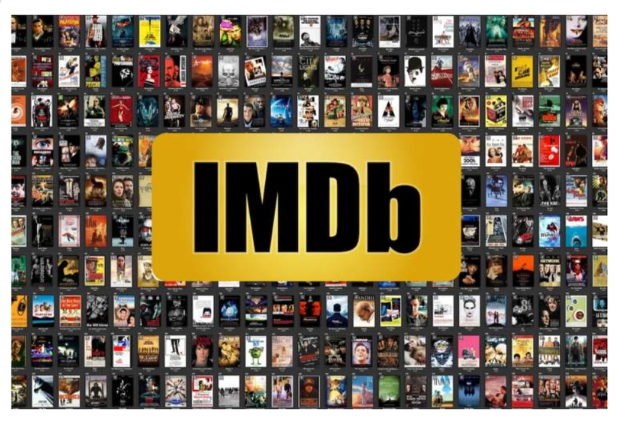

##


.0데이터 로드 및 전처리
케라스에서는 IMDB 영화 리뷰 데이터를 imdb.load_data() 함수를 통해 다운로드가 가능합니다. 예제로 사용하는 것이니 num_words는 10000개로만 제한하여 데이터를 로드합니다. 즉, 단어의 인덱스는 0부터 9999까지만 구성됩니다.

train_data의 0번째를 출력해보면 단어들의 인덱스가 출력되는 것을 알 수 있습니다. 그리고 train_label의 0번째를 출력하면 긍정을 의미하는 1이 출력되는 것을 알 수 있습니다.

In [19]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


IMDB의 데이터셋은 인덱스로만 구성되어 있기 때문에 실제 단어들로 변환하기 위해서는 단어 인덱스 딕셔너리를 이용해야하며, imdb.get_word_index() 함수를 통해 얻을 수 있습니다.
아래 코드블럭의 주석을 풀면 word_index 딕셔너리를 확인하실 수 있습니다.
(스크롤의 압박이 느껴질 수 있어요.😅)

In [20]:
word_index = imdb.get_word_index()
# word_index

단어 인덱스 딕셔너리를 인덱스 단어 딕셔너리 형태로 역으로 변환시킵니다.
아래 코드블럭의 주석을 풀면 index_word 딕셔너리를 확인하실 수 있습니다.
(스크롤의 압박이 느껴질 수 있어요.😅)

In [21]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
# index_word

imdb.get_word_index() 함수를 통해 얻은 데이터의 index는 단어 출현 빈도 기준으로 내림차수 정렬되어있습니다. 따라서 아래 코드블럭의 index_word 의 키 값을 바꿔가며 해당 출현 빈도 순에 해당하는 단어를 살펴볼 수 있어요.

In [22]:
# 1 순위의 출현 빈도를 기록한 단어를 출력합니다.
# 키 값의 숫자를 바꿔가며 다른 순위의 단어들도 확인해볼 수 있어요!
index_word[1]

'the'

index_word의 키를 바꿔가며 출현 순위별 단어를 확인해보았다면 아래 코드를 작성해보세요.

Q. 25번째 단어를 키로 삼아 word_index에 어떤 값(value)가 담겨있는지 확인해 봅시다.

In [23]:
word_25th = index_word[25] #[[YOUR CODE]]
print(word_25th)

have


train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들어 줍니다.

In [24]:
review = ' '.join([str(i) for i in train_data[0]])
review

'1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32'

In [25]:
review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

텍스트 데이터를 딥러닝 모델의 학습에 사용하기 위해서는 원-핫 인코딩(one-hot encoding)을 이용해 0과 1의 벡터로 변환하여 Dense 레이어를 사용하는 방법이 있고, 그 밖에도 고정 길이를 가지도록 패딩(padding)을 추가하고 임베딩(embedding) 레이어를 사용하는 방법이 있습니다. 이 예제에서는 10000 차원을 가지는 원-핫 인코딩으로 IMDB 데이터를 처리하도록 합니다.

In [26]:
def one_hot_encoding(data, dim=10000): # imdb 데이터의 num_words를 10000으로 설정해서 dim도 10000으로 맞춰줍니다.
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


IMDB의 레이블은 1은 긍정, 0은 부정으로 정의되어 있는데, 정수형 값을 실수형 값으로 변환을 시켜줍니다.

In [27]:
print(train_labels[0])
print(test_labels[0])

1
0


In [28]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])
print(y_test[0])

1.0
0.0


### 모델 구성
이제 실제 IMDB 데이터셋을 학습하고 긍정/부정을 분류할 딥러닝 모델을 정의합니다. Sequential() 함수를 이용해서 순차적으로 레이어를 추가합니다.

첫번째 레이어는 Dense로 유닛수 16개를 가지고, input_shape을 (10000, )으로 정의하여 10000 차원의 데이터를 입력으로 받을 수 있게 합니다. 그리고 활성화 함수인 activation은 relu로 사용하고, 레이어의 이름인 name을 input으로 지정합니다.

두번째 레이어도 마찬가지로 Dense로 유닛수 16개를 가지고, relu 활성화 함수를 사용하고 이름은 hidden으로 지정합니다.

세번째 레이어도 Dense 레이어를 사용하지만, 긍정/부정 결과만 받도록 유닛수는 1개만 가지고, 활성화 함수는 sigmoid를 사용하고, 이름은 output으로 지정합니다.

In [29]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(16, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

### 모델 컴파일 및 학습
이제 정의한 모델을 컴파일을 통해서 옵티마이저인 optimizer는 rmsprop를 사용하고, 손실 함수인 loss는 긍정/부정만 분류하므로 binary_crossentropy를 지정합니다. 그리고 지표인 metrics는 accuracy를 사용합니다. 이제 summary() 함수를 사용해 모델의 구조를 시각화합니다.

In [30]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                160016    
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


이제 딥러닝 모델을 학습하기 위해 fit() 함수를 실행시킵니다. 학습에 사용되는 데이터로 x_train과 y_train을 지정하고, 에폭 수인 epochs는 20으로 지정하고, 배치 사이즈인 batch_size는 512로 지정합니다. 그리고 검증을 위해서 테스트 데이터인 x_test와 y_test를 지정해줍니다.

In [38]:
history = model.fit(x_train, y_train,
                    epochs=5,                  # 에폭수 20 -> 10으로 줄여 보기,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/5
49/49 [==============================] - 1s 21ms/step - loss: 6.3349e-05 - accuracy: 1.0000 - val_loss: 1.7320 - val_accuracy: 0.8500
Epoch 2/5
49/49 [==============================] - 1s 22ms/step - loss: 5.5423e-05 - accuracy: 1.0000 - val_loss: 1.7486 - val_accuracy: 0.8501
Epoch 3/5
49/49 [==============================] - 1s 28ms/step - loss: 4.9492e-05 - accuracy: 1.0000 - val_loss: 1.7654 - val_accuracy: 0.8504
Epoch 4/5
49/49 [==============================] - 1s 29ms/step - loss: 4.4832e-05 - accuracy: 1.0000 - val_loss: 1.7787 - val_accuracy: 0.8505
Epoch 5/5
49/49 [==============================] - 1s 28ms/step - loss: 4.1098e-05 - accuracy: 1.0000 - val_loss: 1.7925 - val_accuracy: 0.8505


학습하며 저장된 모델의 지표 결과인 history에서 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

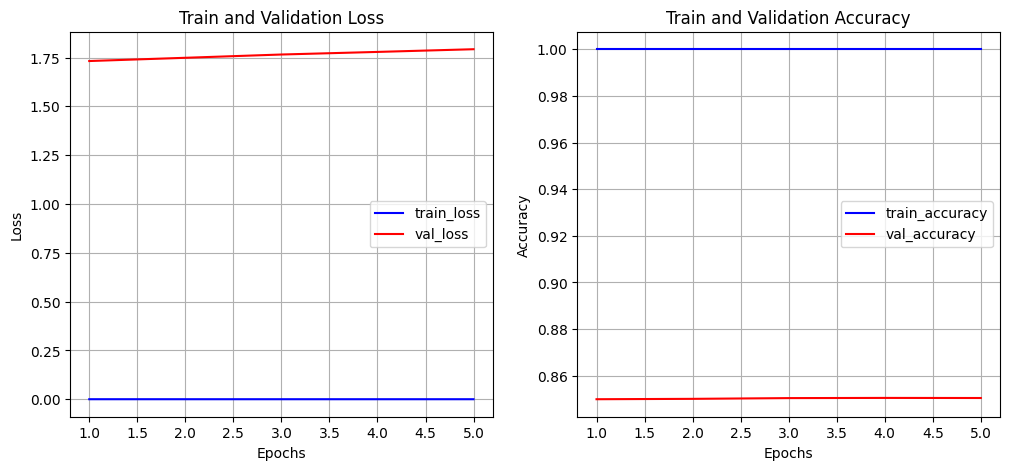

In [39]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

딥러닝 모델의 결과를 살펴보면 val_loss가 점점 증가하는 것을 알 수 있고, val_accuracy는 점점 감소하는 것을 알 수 있습니다. 즉, 과대적합되어 학습용 데이터셋에 대해서만 모델이 적합하게 된 것을 알 수 있습니다.

### 6-5. 마무리하며

#### 이번 시간 정리
- 딥러닝 모델을 학습하기 위한 다양한 기술들에 대해서 이해했습니다.
- 딥러닝 모델이 잘 학습되지 않을 경우 발생하는 과소적합과 과대적합에 대해서 이해했습니다.
- IMDB 데이터셋을 이용한 딥러닝 분류 모델 예제를 살펴보았습니다.
### 종합 퀴즈
'모델 학습 기술'을 수강하신 여러분 다들 수고 많으셨습니다.

아래 퀴즈와 함께 오늘의 학습을 마무리해보시죠.

Q. IMDB 데이터셋을 이용한 딥러닝 분류 모델의 결과는 과대적합이었습니다. 혹시 이를 방지하기 위해 오늘 배운 내용 중 적용해볼 수 있는 것이 있을까요?